# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#check to see what this is actually collecting
#cities

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url for weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

In [5]:
#initialize the lists for all the data
lat_list = []
long_list = []
max_temp_list = []
clouds_list = []
humidity_list = []
wind_list = []
country_list = []
city_list = []
date_list = []

#signaling the beginning of the data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

#loop to get city data
for city in cities:
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    #json request
    response = requests.get(query_url).json()

    #conditional to check for cities not found
    if response == {'cod': '404', 'message': 'city not found'}:
        print("City not found. Skipping...")
    
    #conditional for cities found
    else:
        
        #sanity check
        #pprint.pprint(response)
        
        #save the new city list
        city_list.append(city)
        
        #save the latitude
        lat = (response['coord']['lat'])
        lat_list.append(lat)
        
        #save the longitude
        long = (response['coord']['lon'])
        long_list.append(long)
        
        #sanity check
        #print(lat)
        
        #save the temperature
        max_temp = (response['main']['temp_max'])
        max_temp_list.append(max_temp)
        
        #save the cloudiness
        clouds = (response['clouds']['all'])
        clouds_list.append(clouds)
        
        #save the humidity
        humidity = (response['main']['humidity'])
        humidity_list.append(humidity)
        
        #save the wind speed
        wind = (response['wind']['speed'])
        wind_list.append(wind)
        
        #save the country
        country = (response['sys']['country'])
        country_list.append(country)
        
        #save the date
        date = (response['dt'])
        date_list.append(date)
        
        #print the record for each city
        print(f'Processing Record {cities.index(city) + 1} of Set  | {city}')
 

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 of Set  | cape town
Processing Record 3 of Set  | chengde
Processing Record 4 of Set  | rikitea
Processing Record 5 of Set  | hithadhoo
Processing Record 6 of Set  | sitka
Processing Record 7 of Set  | cortez
Processing Record 8 of Set  | sioux lookout
Processing Record 9 of Set  | saldanha
City not found. Skipping...
Processing Record 11 of Set  | cockburn town
Processing Record 12 of Set  | tasiilaq
Processing Record 13 of Set  | bredasdorp
Processing Record 14 of Set  | husavik
Processing Record 15 of Set  | port alfred
Processing Record 16 of Set  | nanortalik
Processing Record 17 of Set  | basoko
Processing Record 18 of Set  | aykhal
Processing Record 19 of Set  | castro
Processing Record 20 of Set  | ushuaia
Processing Record 21 of Set  | zhaodong
Processing Record 22 of Set  | mar del plata
Processing Record 23 of Set  | ilulissat
Processing Record 24 of Set  | meulaboh
Process

Processing Record 205 of Set  | socorro
Processing Record 206 of Set  | pevek
Processing Record 207 of Set  | lanzhou
Processing Record 208 of Set  | maputo
Processing Record 209 of Set  | north bend
Processing Record 210 of Set  | slave lake
Processing Record 211 of Set  | buloh kasap
Processing Record 212 of Set  | susaki
Processing Record 213 of Set  | suntar
Processing Record 214 of Set  | buraydah
Processing Record 215 of Set  | launceston
Processing Record 216 of Set  | bambous virieux
Processing Record 217 of Set  | biak
Processing Record 218 of Set  | chokurdakh
Processing Record 219 of Set  | brae
City not found. Skipping...
Processing Record 221 of Set  | kavieng
Processing Record 222 of Set  | mehamn
Processing Record 223 of Set  | taitung
Processing Record 224 of Set  | bridgetown
Processing Record 225 of Set  | pacific grove
Processing Record 226 of Set  | sobolevo
Processing Record 227 of Set  | khatanga
Processing Record 228 of Set  | kapaa
Processing Record 229 of Set  

Processing Record 410 of Set  | kommunisticheskiy
Processing Record 411 of Set  | dryden
Processing Record 412 of Set  | huarmey
Processing Record 413 of Set  | constitucion
Processing Record 414 of Set  | canon city
Processing Record 415 of Set  | puerto leguizamo
Processing Record 416 of Set  | yar-sale
Processing Record 417 of Set  | george
Processing Record 418 of Set  | claremont
Processing Record 419 of Set  | sorland
Processing Record 420 of Set  | roald
City not found. Skipping...
City not found. Skipping...
Processing Record 423 of Set  | kushima
Processing Record 424 of Set  | barabai
Processing Record 425 of Set  | nicosia
Processing Record 426 of Set  | redcar
Processing Record 427 of Set  | faanui
Processing Record 428 of Set  | maracaju
Processing Record 429 of Set  | bauchi
Processing Record 430 of Set  | coos bay
Processing Record 431 of Set  | sao felix do xingu
Processing Record 432 of Set  | bonnyville
Processing Record 433 of Set  | half moon bay
Processing Record 4

Processing Record 612 of Set  | fortuna
Processing Record 613 of Set  | rocha
Processing Record 614 of Set  | paita
Processing Record 615 of Set  | ravar
Processing Record 616 of Set  | kurilsk
Processing Record 617 of Set  | inuvik
Processing Record 618 of Set  | klaksvik
Processing Record 619 of Set  | burgos
Processing Record 620 of Set  | argentan
Processing Record 621 of Set  | dunmanway
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#creating the dictionary for the data frame
weather_data = {'city':city_list, 'lat':lat_list, 'lng':long_list, 'Max Temp': max_temp_list, 'Humidity': humidity_list, 'Cloudiness': clouds_list, 'Wind Speed': wind_list, 'Country': country_list, 'Date':date_list}

In [7]:
#sanity check
#print(len(city_list))
#print(len(lat_list))
#print(len(long_list))
#print(len(max_temp_list))
#print(len(humidity_list))
#print(len(wind_list))
#print(len(date_list))
#print(len(clouds_list))
#print(len(country_list))

In [8]:
#create the weather data frame
weather_df = pd.DataFrame(weather_data)

In [9]:
#sanity check
weather_df.count()  

city          569
lat           569
lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
#displaying the data frame
weather_df

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.93,18.42,286.48,93,0,1.50,ZA,1595361700
1,chengde,40.97,117.94,291.23,71,0,0.56,CN,1595361700
2,rikitea,-23.12,-134.97,292.21,63,92,8.64,PF,1595360995
3,hithadhoo,-0.60,73.08,302.00,76,64,4.03,MV,1595361029
4,sitka,57.05,-135.33,287.15,87,90,2.60,US,1595361168
...,...,...,...,...,...,...,...,...,...
564,inuvik,68.35,-133.72,281.15,65,90,3.10,CA,1595361841
565,klaksvik,62.23,-6.59,284.15,81,0,4.60,FO,1595361764
566,burgos,42.34,-3.71,292.59,82,20,4.10,ES,1595361841
567,argentan,48.75,-0.02,290.15,63,0,3.60,FR,1595361842


In [11]:
#output the file
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#check to see if there are cities with humidity greater than 100
weather_df[weather_df.Humidity > 100]

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

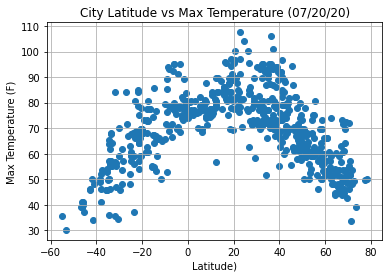

In [147]:
#pulling the values to be graphed
max_temp_data = weather_df['Max Temp'].tolist()
latitude_data = weather_df['lat'].tolist()

#convert the temperature data
converted_temp = []

for item in max_temp_data:
    f = (float(item) - 273.15) * 1.8 + 32
    converted_temp.append(f)

#sanity check
#print(max_temp_data)

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, converted_temp)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig1.png')

plt.show()

## Latitude vs. Humidity Plot

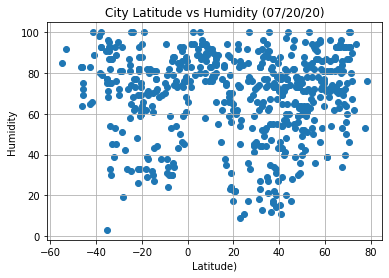

In [148]:
#pulling the values to be graphed
humidity_data = weather_df['Humidity'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, humidity_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig2.png')

plt.show()

## Latitude vs. Cloudiness Plot

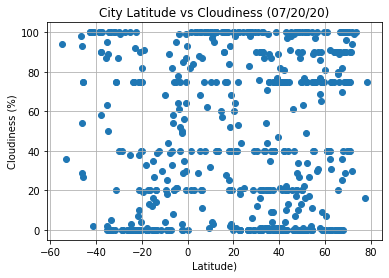

In [149]:
#pulling the values to be graphed
cloud_data = weather_df['Cloudiness'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, cloud_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig3.png')

plt.show()

## Latitude vs. Wind Speed Plot

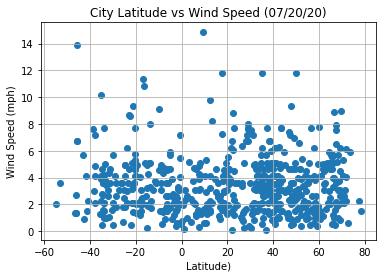

In [150]:
#pulling the values to be graphed
wind_data = weather_df['Wind Speed'].tolist()

#adding labels
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (07/20/20)")

#plotting the graph
plt.scatter(latitude_data, wind_data)

#adding a grid
plt.grid(True)

plt.savefig('output_data/fig4.png')

plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df.lat >= 0]
southern_df = weather_df[weather_df.lat < 0]

#sanity check
#northern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4778964453257607


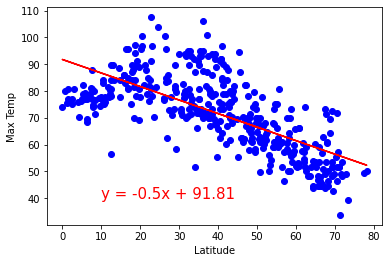

In [152]:
#xvalues
x_values = northern_df['lat']

#convert the temperature data
north_converted_temp = []

for item in northern_df['Max Temp']:
    f = (float(item) - 273.15) * 1.8 + 32
    north_converted_temp.append(f)

#yvalues
y_values = north_converted_temp


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#plot it
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6103415490219001


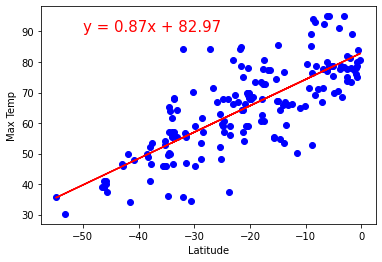

In [153]:
#xvalues
x_values = southern_df['lat']

#convert the temperature data
south_converted_temp = []

for item in southern_df['Max Temp']:
    f = (float(item) - 273.15) * 1.8 + 32
    south_converted_temp.append(f)

#yvalues
y_values = south_converted_temp


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#plot it
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00027929451744265505


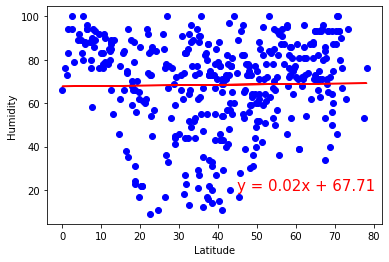

In [154]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot it
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03279159355568102


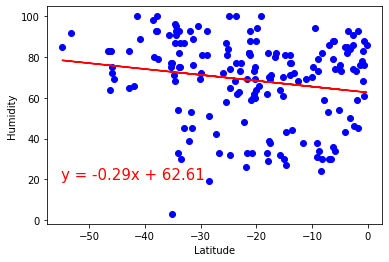

In [155]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot it
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00022189713964187248


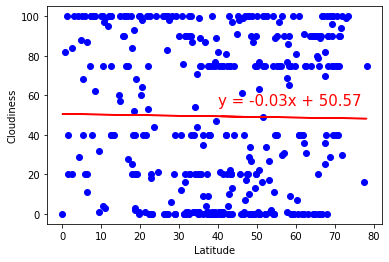

In [156]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,55),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#plot it
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02559192641760159


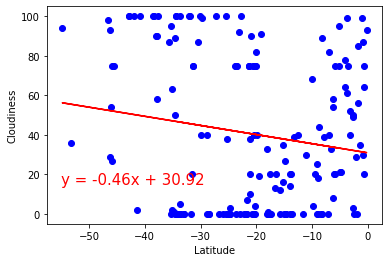

In [157]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 15),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#plot it
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009519935148028302


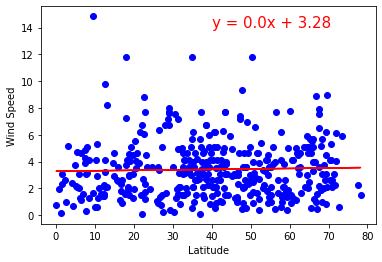

In [158]:
#xvalues
x_values = northern_df['lat']

#yvalues
y_values = northern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#plot it
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010603997194212388


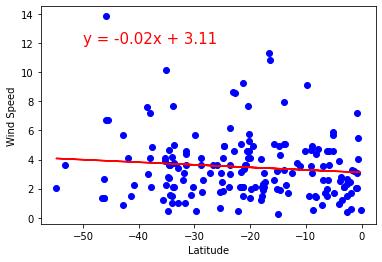

In [159]:
#xvalues
x_values = southern_df['lat']

#yvalues
y_values = southern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the r squared value
print(f'The r-squared is: {rvalue**2}')

#make the scatter plot
plt.scatter(x_values,y_values, c='blue')

#plot the 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 12),fontsize=15,color="red")

#add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#plot it
plt.show()